In [2]:
import numpy as np
import auxiliary as au
file1='/Users/localuser/Downloads/stndata_whole.npz'
file2='/Users/localuser/Downloads/mergecorr_trange_RMSE.npz'
file3='/Users/localuser/Research/Test/mergecorr_trange_RMSE.npz'
d1=np.load(file1)
d2=np.load(file2)
d3=np.load(file3)
trange1=d1['trange_stn']
trange2=d2['reacorr_stn'][0]
trange3=d3['reacorr_stn'][0]
nstn,ntimes=np.shape(trange1)
met=np.zeros([2,nstn,4])
for i in range(nstn):
    met[0,i,:] = au.metric(trange1[i],trange2[i])
    met[1,i,:] = au.metric(trange1[i],trange3[i])
for i in range(2):
    print(np.nanmean(met[i],axis=0))

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/localuser/Github/PyGMET/auxiliary.py:150: RuntimeWarning: Mean of empty slice
  metout[1] = np.nanmean(pre - obs)  # ME
/Users/localuser/Github/PyGMET/auxiliary.py:151: RuntimeWarning: Mean of empty slice
  metout[2] = np

[ 0.75860596 -0.02266114  2.41889808  3.12342345]
[0.75558377 0.00402423 2.45591684 3.16678333]


In [66]:
import numpy as np
import auxiliary as au
file1='/Users/localuser/Downloads/stndata_whole.npz'
file2='/Users/localuser/GMET/merge/daily_regression_stn.npz'
file3='/Users/localuser/Research/Test/mergecorr_prcp_RMSE.npz'
file4='/Users/localuser/GMET/merge/OImerge_stn_prcp.npz'
d1=np.load(file1)
d2=np.load(file2)
d3=np.load(file3)
d4=np.load(file4)
# print(d1.files,d2.files,d3.files,d4.files)
trange1=d1['prcp_stn']
trange2=d2['prcp']
trange3=d3['reamerge_stn']
trange4=d4['oimerge_stn']
nstn,ntimes=np.shape(trange1)
met=np.zeros([3,nstn,4])
for i in range(nstn):
    met[0,i,:] = au.metric(trange1[i],trange2[i])
    met[1,i,:] = au.metric(trange1[i],trange3[i])
    met[2,i,:] = au.metric(trange1[i],trange4[i])
for i in range(3):
    print(np.nanmedian(met[i],axis=0))

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/localuser/Github/PyGMET/auxiliary.py:150: RuntimeWarning: Mean of empty slice
  metout[1] = np.nanmean(pre - obs)  # ME
/Users/localuser/Github/PyGMET/auxiliary.py:151: RuntimeWarning: Mean of empty slice
  metout[2] = np

[0.7827688  0.01864397 1.47105545 3.98211331]
[ 0.74983402 -0.20226415  1.5497961   4.32772381]
[ 0.8471735  -0.05159292  1.28223649  3.36046394]


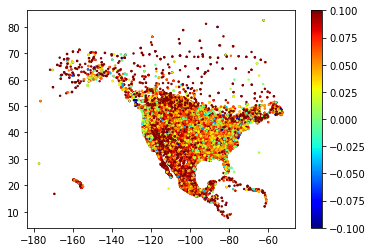

In [30]:
stnlle=d1['stn_lle']
from matplotlib import pyplot as plt
plt.scatter(stnlle[:,1],stnlle[:,0],,met[2,:,0]-met[0,:,0],cmap='jet')
plt.colorbar()
plt.clim([-0.1,0.1])

In [74]:
# trange33=d3['reacorr_stn']
file5='/Users/localuser/Research/Test/ERA5_downto_stn.npz'
d5=np.load(file5)
trange5=d5['prcp_readown']

In [67]:
for i in range(3):
    print(met[i,12300])

[0.74768394 0.07042189 0.63169003 1.61088865]
[0.67743479 0.06466469 0.68648279 1.82761903]
[0.80352724 0.02669809 0.57030834 1.44203232]


Text(0, 25, 'CC=0.82, ME=0.02, RMSE=2.03')

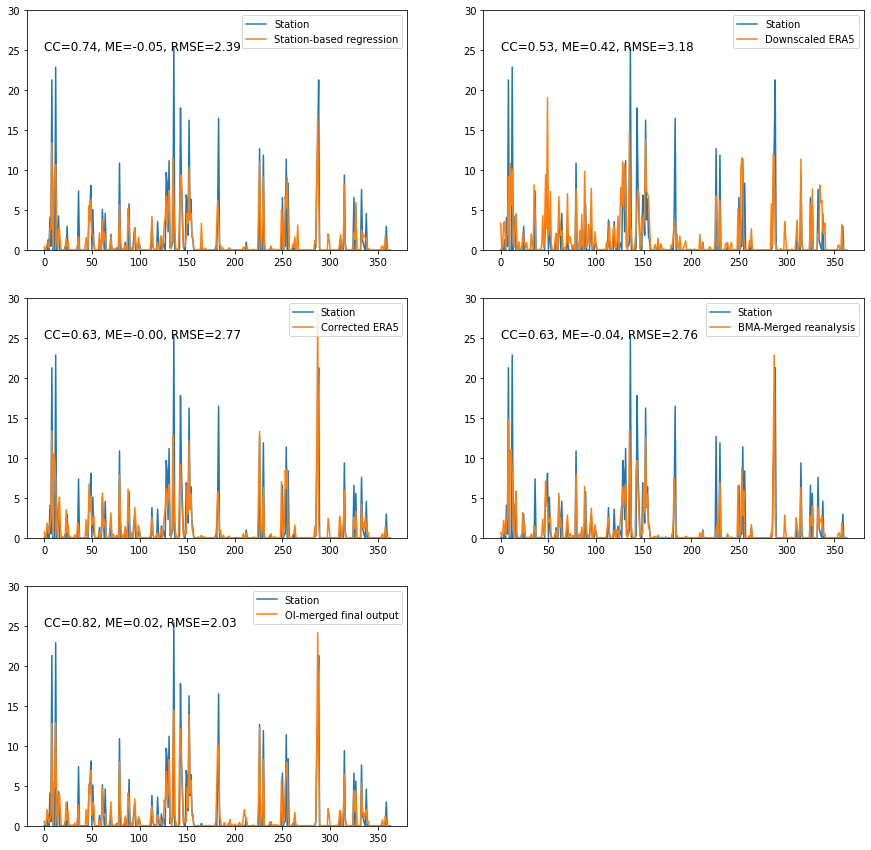

In [100]:
# plot figure for a specific station
inum=12300
plt.figure(figsize=[15,15])
plt.subplot(321)
plt.plot(trange1[inum,366:730])
plt.plot(trange2[inum,366:730])
plt.ylim([0,30])
plt.legend(['Station','Station-based regression'],loc='upper right')
met=au.metric(trange1[inum,366:730],trange2[inum,366:730])
met=met[[0,1,3]]
plt.text(0,25,r'CC={0:.2f}, ME={1:.2f}, RMSE={2:.2f}'.format(*[round(meti,3) for meti in met]),fontsize=12)

plt.subplot(322)
plt.plot(trange1[inum,366:730])
plt.plot(trange5[inum,366:730])
plt.ylim([0,30])
plt.legend(['Station','Downscaled ERA5'],loc='upper right')
met=au.metric(trange1[inum,366:730],trange5[inum,366:730])
met=met[[0,1,3]]
plt.text(0,25,r'CC={0:.2f}, ME={1:.2f}, RMSE={2:.2f}'.format(*[round(meti,3) for meti in met]),fontsize=12)


plt.subplot(323)
plt.plot(trange1[inum,366:730])
plt.plot(trange33[0,inum,366:730])
plt.ylim([0,30])
plt.legend(['Station','Corrected ERA5'],loc='upper right')
met=au.metric(trange1[inum,366:730],trange33[0,inum,366:730])
met=met[[0,1,3]]
plt.text(0,25,r'CC={0:.2f}, ME={1:.2f}, RMSE={2:.2f}'.format(*[round(meti,3) for meti in met]),fontsize=12)

plt.subplot(324)
plt.plot(trange1[inum,366:730])
plt.plot(trange3[inum,366:730])
plt.ylim([0,30])
plt.legend(['Station','BMA-Merged reanalysis'],loc='upper right')
met=au.metric(trange1[inum,366:730],trange3[inum,366:730])
met=met[[0,1,3]]
plt.text(0,25,r'CC={0:.2f}, ME={1:.2f}, RMSE={2:.2f}'.format(*[round(meti,3) for meti in met]),fontsize=12)

plt.subplot(325)
plt.plot(trange1[inum,366:730])
plt.plot(trange4[inum,366:730])
plt.ylim([0,30])
plt.legend(['Station','OI-merged final output'],loc='upper right')
met=au.metric(trange1[inum,366:730],trange4[inum,366:730])
met=met[[0,1,3]]
plt.text(0,25,r'CC={0:.2f}, ME={1:.2f}, RMSE={2:.2f}'.format(*[round(meti,3) for meti in met]),fontsize=12)

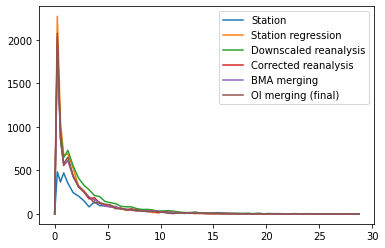

In [141]:
# plot PDF
def epdf(x):
    bins1=np.arange(0.1,1,0.3)
    bins2=np.arange(1,30,0.5)
    bins=np.concatenate((bins1,bins2))
    num=len(bins)-1
    xs = np.zeros(num)
    ys = np.zeros(num)
    for i in range(1,num):
        xs[i] = (bins[i-1]+bins[i])/2
        ys[i] = np.sum((x>bins[i-1]) & (x<=bins[i]))
    return xs, ys

inum=12300
xs,ys=epdf(trange1[inum,366:])
plt.plot(xs,ys)

xs,ys=epdf(trange2[inum,366:])
plt.plot(xs,ys)

xs,ys=epdf(trange5[inum,366:])
plt.plot(xs,ys)

xs,ys=epdf(trange33[0,inum,366:])
plt.plot(xs,ys)

xs,ys=epdf(trange3[inum,366:])
plt.plot(xs,ys)

xs,ys=epdf(trange4[inum,366:])
plt.plot(xs,ys)

plt.legend(['Station','Station regression','Downscaled reanalysis','Corrected reanalysis','BMA merging','OI merging (final)'])

ax = plt.gca()
# ax.set_xscale('log')

(0.0, 30.0)

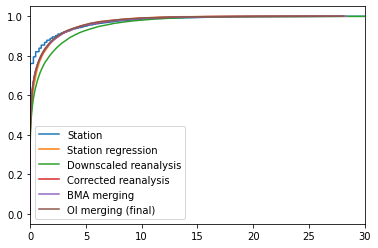

In [151]:
ecdf=ECDF(trange1[inum,366:])
plt.plot(ecdf.x,ecdf.y)

ecdf=ECDF(trange2[inum,366:])
plt.plot(ecdf.x,ecdf.y)

ecdf=ECDF(trange5[inum,366:])
plt.plot(ecdf.x,ecdf.y)

ecdf=ECDF(trange33[0,inum,366:])
plt.plot(ecdf.x,ecdf.y)

ecdf=ECDF(trange3[inum,366:])
plt.plot(ecdf.x,ecdf.y)

ecdf=ECDF(trange4[inum,366:])
plt.plot(ecdf.x,ecdf.y)

plt.legend(['Station','Station regression','Downscaled reanalysis','Corrected reanalysis','BMA merging','OI merging (final)'])
plt.xlim([0,30])

In [144]:
ecdf.